<a href="https://colab.research.google.com/github/AbhisarS/TensorFlow/blob/master/Unsupervised_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factor** **Analysis**

In [ ]:
#Importing the data set
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

#Displaying the details of the dataset.
print("The description of the data set is: \n", diabetes.DESCR)
x=diabetes.data
y=diabetes.target
print("Dimensions of independent variables:", x.shape)

The description of the data set is: 
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each 

In [ ]:
#Applying Bartlett's test of sphericity for determining adequacy.
#Importing necessary libraries.
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chisquare, p_value = calculate_bartlett_sphericity(x)
print("Chi Square Value of Bartlett test: ", chisquare.round(3))
print("p value of Bartlett test: ", p_value.round(3))

Chi Square Value of Bartlett test:  3385.309
p value of Bartlett test:  0.0


In [ ]:
#Applying KMO test for determining adequacy.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_values, kmo_model=calculate_kmo(x)
print("KMO Model:", kmo_model.round(3))
print("KMO Values:\n", kmo_values.round(3))

KMO Model: 0.535
KMO Values:
 [0.877 0.839 0.878 0.83  0.39  0.413 0.332 0.786 0.425 0.928]


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Eigen values are:
 [4.024 1.492 1.206 0.955 0.662 0.603 0.537 0.434 0.078 0.009]
Values are:
 [ 3.728  1.573  0.888  0.216  0.119  0.091  0.017 -0.075 -0.192 -0.289]


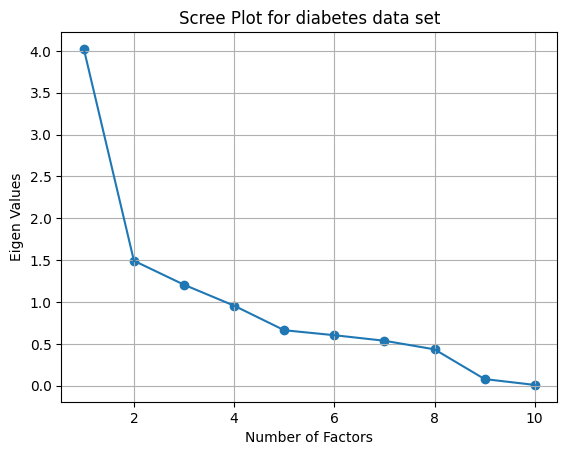

In [ ]:
#Create factor analysis object and perform factor analysis.
fa = FactorAnalyzer()
fa.fit(x)

#Determining eigenvalues.
eigen_value, value = fa.get_eigenvalues()
print("Eigen values are:\n", eigen_value.round(3))
print("Values are:\n", value.round(3))

#Create scree plot for determining optimum number of factors.
import matplotlib.pyplot as plt
plt.scatter(range(1, x.shape[1]+1), eigen_value)
plt.plot(range(1, x.shape[1] + 1), eigen_value)
plt.title('Scree Plot for diabetes data set')
plt.xlabel('Number of Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

In [ ]:
#Performing factor analysis for optimum njumber(3) of factors.
fa = FactorAnalyzer()
fa.fit(x,3)
print("Factor loading are:\n", fa.loadings_.round(3))

#Display variance of all factors.
print("Variances of each factor:\n", fa.get_factor_variance())

Factor loading are:
 [[ 0.046  0.109  0.49 ]
 [-0.071 -0.337  0.125]
 [ 0.002 -0.187  0.459]
 [-0.132  0.082  0.791]
 [ 1.026  0.29   0.138]
 [ 0.937 -0.065 -0.123]
 [ 0.17   1.127  0.182]
 [ 0.473 -0.737 -0.09 ]
 [ 0.186 -0.203  0.464]
 [ 0.038 -0.076  0.577]]
Variances of each factor:
 (array([2.24478218, 2.11546873, 1.71553416]), array([0.22447822, 0.21154687, 0.17155342]), array([0.22447822, 0.43602509, 0.60757851]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# **Principal Component Analysis**

Original shape of Friedman data set:  (100, 10)
Reduced shape of Friedman dat set: (100, 4)
Shape of Principal Components: (4, 10)
Details of Principal Components:
 [[-0.293 -0.075  0.344 -0.276  0.446  0.087 -0.236 -0.383  0.378 -0.403]
 [ 0.058 -0.004 -0.122  0.498  0.042 -0.382  0.528 -0.241  0.128 -0.482]
 [ 0.377  0.372  0.506  0.155  0.008  0.282 -0.07   0.274 -0.292 -0.441]
 [ 0.226 -0.049 -0.421  0.114  0.729  0.304  0.02  -0.118 -0.338  0.064]]
Component-wise explained variance: 
 [0.161 0.15  0.116 0.11 ]


/tmp/ipython-input-1670062307.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


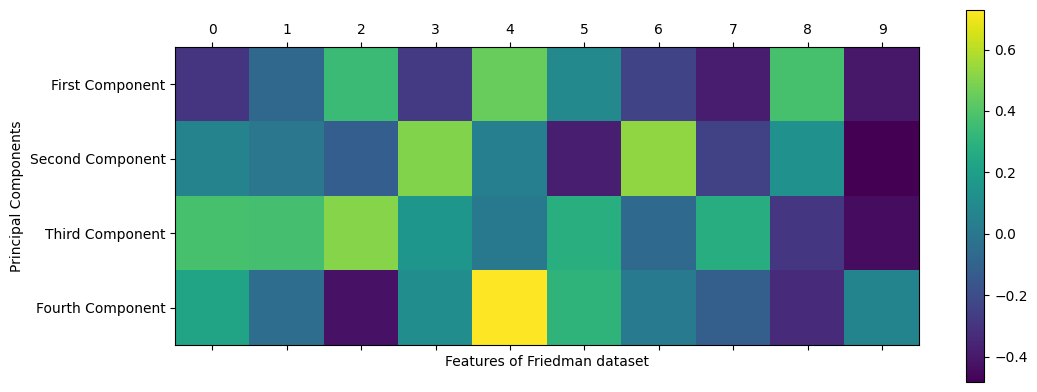

In [ ]:
#Principal Component Analysis.
#Importing necessary libraries and loading data.
from sklearn.decomposition import PCA
from sklearn.datasets import make_friedman1
x,y=make_friedman1()

#Performing peincipal compnent analysis.
pca = PCA(n_components=4)
pca.fit(x)
x_transformed=pca.transform(x)
print("Original shape of Friedman data set: ", x.shape)
print("Reduced shape of Friedman dat set:", x_transformed.shape)
print("Shape of Principal Components:", pca.components_.shape)
print("Details of Principal Components:\n", pca.components_.round(3))
print("Component-wise explained variance: \n", pca.explained_variance_ratio_.round(3))

#Creating the chart for depicting components.
import matplotlib.pyplot as plt
plt.matshow(pca.components_)
plt.yticks(range(4), ["First Component", "Second Component", "Third Component", "Fourth Component"])
plt.colorbar()
plt.xticks(range(10))
plt.tight_layout()
plt.xlabel("Features of Friedman dataset")
plt.ylabel("Principal Components")
plt.show()

# **Clustering**

**K-Means Clustering**

Dimension of data set is:  (150, 4)


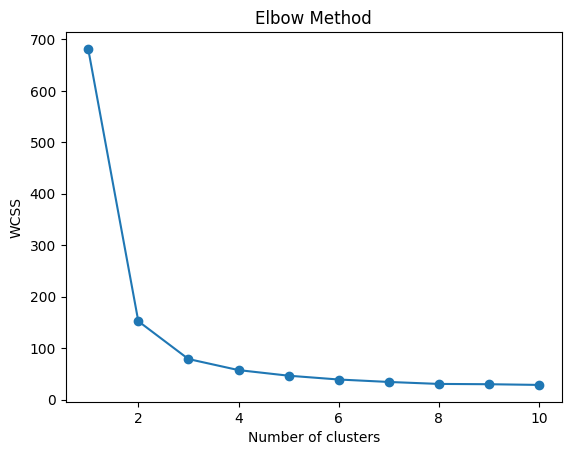

The predicted clusters are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
The centers are:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Details of the predicted cluster are:
 <bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: Predicted, Length: 150, dtype: int32>
Misclassified samples: 136
Confusion matrix is:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Accuracy of the model is:  0.09333333333333334


/tmp/ipython-input-504426562.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kmeansdf['Original'].replace(to_replace=int("0"), value="Setosa", inplace=True)
/tmp/ipython-input-504426562.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

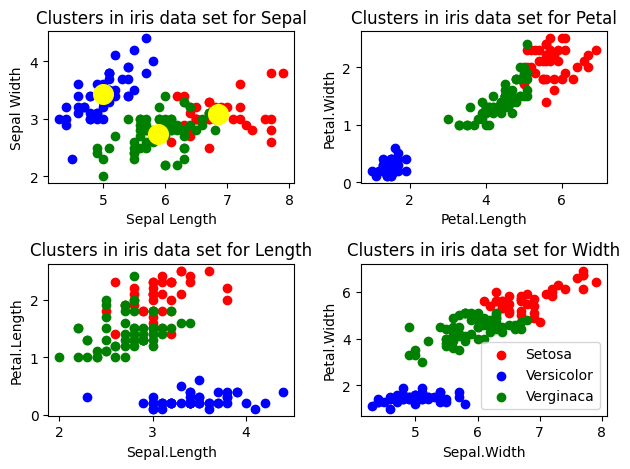

In [ ]:
#Importing necessary libraries and loading data.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
print("Dimension of data set is: ", X.shape)

#Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)

  #inertia= WCSS (within cluster sum of squares)
  list1.append(kmeans.inertia_)

#Creating the scree plot.
plt.plot(range(1,11),list1, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Fitting K-means algorithm to data set with optimum number of clusters.
kmeans=KMeans(n_clusters=3, random_state=10)
y_kmeans=kmeans.fit_predict(X)
print("The predicted clusters are:\n", y_kmeans)
print("The centers are:\n", kmeans.cluster_centers_)

#Determining number of observations in the cluster.
import pandas
data = {'Original':y, 'Predicted': y_kmeans}
kmeansdf = pandas.DataFrame(data,columns=['Original','Predicted'])
print("Details of the predicted cluster are:\n", kmeansdf["Predicted"].value_counts)
count_misclassified = (kmeansdf.Original != kmeansdf.Predicted).sum()
print('Misclassified samples: {}'.format(count_misclassified))

#Creating names of the clusters.
kmeansdf['Original'].replace(to_replace=int("0"), value="Setosa", inplace=True)
kmeansdf['Original'].replace(to_replace=int("1"), value="Versicolor", inplace=True)
kmeansdf['Original'].replace(to_replace=int("2"), value="Virginaca", inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("0"), value="Setosa", inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("1"), value="Versicolor", inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("2"), value="Virginaca", inplace=True)

#Creating confusion matrix of the model.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(kmeansdf['Original'], kmeansdf['Predicted'])
print("Confusion matrix is:\n", cm)

#Determining accuracy of the model.
from sklearn.metrics import accuracy_score
score=accuracy_score(kmeansdf['Original'], kmeansdf['Predicted'])
print("Accuracy of the model is: ", score)

#Creating a chart depicting clusters considering different variables.
plt.figure(2)

#Visualizing the clusters for sepal.length and sepal.width.
plt.figure(2)
plt.subplot(221)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],c='red')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],c='blue')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],c='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200, c='yellow', label='Centroids')
plt.title('Clusters in iris data set for Sepal')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')



#Visualizing the clusters for petal.length and petal.wodth.
plt.subplot(222)
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],c='red')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],c='blue')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],c='green')
plt.title('Clusters in iris data set for Petal')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')



#Visualizing the clusters for sepal.length and petal.length.
plt.subplot(223)
plt.scatter(X[y_kmeans==0,1],X[y_kmeans==0,3],c='red', label='Setosa')
plt.scatter(X[y_kmeans==1,1],X[y_kmeans==1,3],c='blue', label = 'Versicolor')
plt.scatter(X[y_kmeans==2,1],X[y_kmeans==2,3],c='green', label = 'Verginaca')
plt.title('Clusters in iris data set for Length')
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')



#Visualizing the clusters for sepal.width and petal.width.
plt.subplot(224)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,2],c='red', label='Setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,2],c='blue', label = 'Versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,2],c='green', label = 'Verginaca')
plt.title('Clusters in iris data set for Width')
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Width')
plt.legend()
plt.tight_layout()
plt.show()

**Refined Code**

Dimension of data set is: (150, 4)


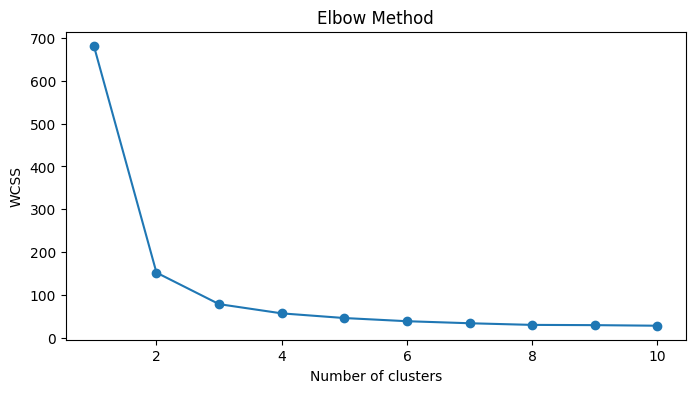

The predicted clusters are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Confusion matrix before label mapping:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Mapping of predicted cluster labels to original labels: {np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(0): np.int64(2)}

Predicted cluster counts:
Predicted_mapped
1    61
0    50
2    39
Name: count, dtype: int64
Misclassified samples: 17
Confusion matrix after label mapping:
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy of the model after label mapping: 0.8866666666666667


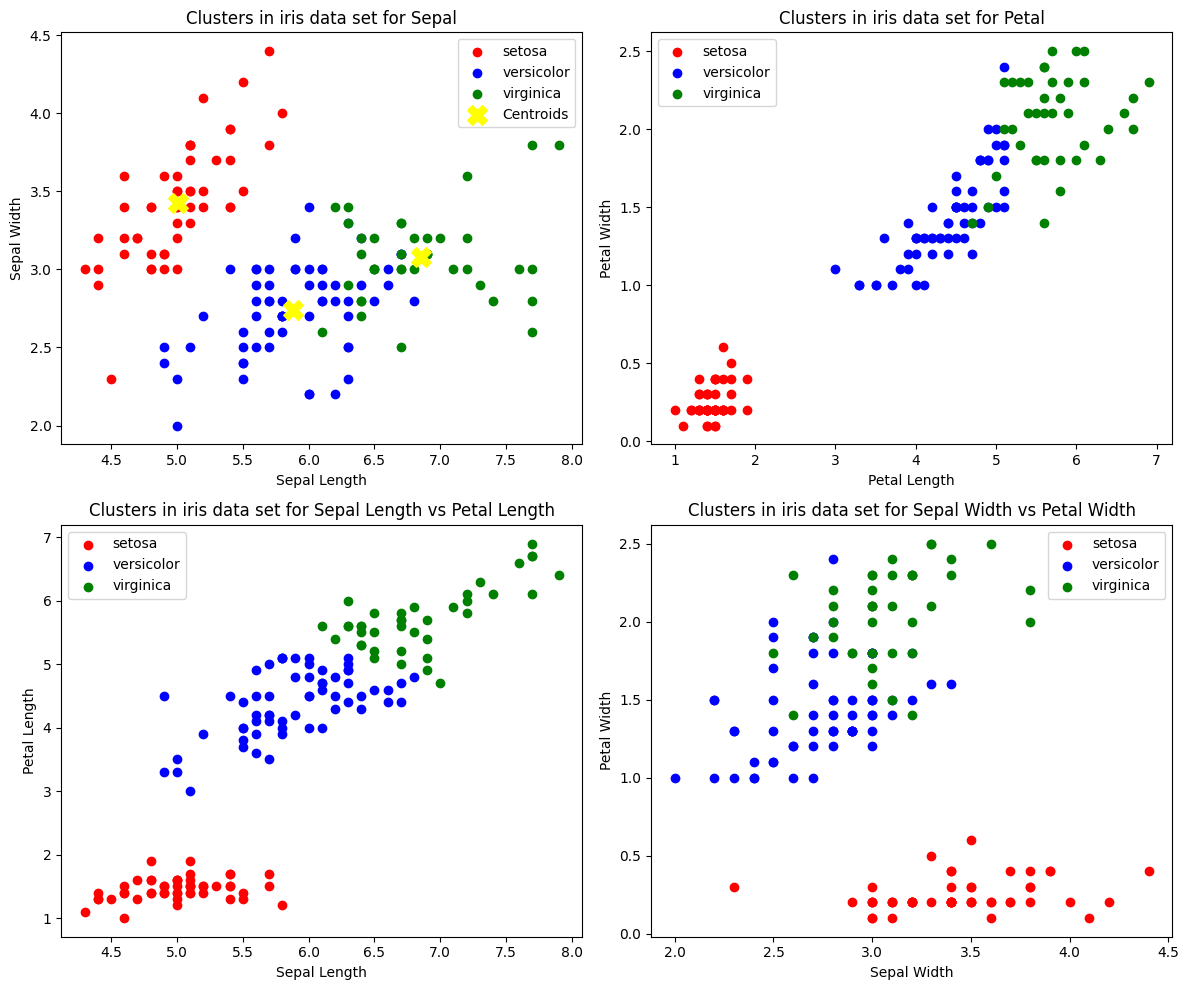

In [ ]:
# Importing necessary libraries and loading data.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Dimension of data set is:", X.shape)

# Using the elbow method to find the optimal number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Creating the scree plot.
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-means with the optimal number of clusters (3 for iris)
kmeans = KMeans(n_clusters=3, random_state=10)
y_kmeans = kmeans.fit_predict(X)
print("The predicted clusters are:\n", y_kmeans)
print("Cluster centers:\n", kmeans.cluster_centers_)

# Put original and predicted labels in a dataframe
df = pd.DataFrame({'Original': y, 'Predicted': y_kmeans})

# Since cluster labels are arbitrary, find best label mapping using Hungarian algorithm
cm = confusion_matrix(df['Original'], df['Predicted'])
print("Confusion matrix before label mapping:\n", cm)

row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
print("Mapping of predicted cluster labels to original labels:", mapping)

# Map predicted labels to original labels
df['Predicted_mapped'] = df['Predicted'].map(mapping)

# Check value counts and misclassified samples
print("\nPredicted cluster counts:")
print(df['Predicted_mapped'].value_counts())

count_misclassified = (df['Original'] != df['Predicted_mapped']).sum()
print('Misclassified samples:', count_misclassified)

# Confusion matrix and accuracy after mapping
cm_mapped = confusion_matrix(df['Original'], df['Predicted_mapped'])
print("Confusion matrix after label mapping:\n", cm_mapped)

score = accuracy_score(df['Original'], df['Predicted_mapped'])
print("Accuracy of the model after label mapping:", score)

# Visualization of clusters for different variable pairs
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.scatter(X[df['Predicted_mapped'] == 0, 0], X[df['Predicted_mapped'] == 0, 1], c='red', label=iris.target_names[0])
plt.scatter(X[df['Predicted_mapped'] == 1, 0], X[df['Predicted_mapped'] == 1, 1], c='blue', label=iris.target_names[1])
plt.scatter(X[df['Predicted_mapped'] == 2, 0], X[df['Predicted_mapped'] == 2, 1], c='green', label=iris.target_names[2])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('Clusters in iris data set for Sepal')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.subplot(222)
plt.scatter(X[df['Predicted_mapped'] == 0, 2], X[df['Predicted_mapped'] == 0, 3], c='red', label=iris.target_names[0])
plt.scatter(X[df['Predicted_mapped'] == 1, 2], X[df['Predicted_mapped'] == 1, 3], c='blue', label=iris.target_names[1])
plt.scatter(X[df['Predicted_mapped'] == 2, 2], X[df['Predicted_mapped'] == 2, 3], c='green', label=iris.target_names[2])
plt.title('Clusters in iris data set for Petal')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.subplot(223)
plt.scatter(X[df['Predicted_mapped'] == 0, 0], X[df['Predicted_mapped'] == 0, 2], c='red', label=iris.target_names[0])
plt.scatter(X[df['Predicted_mapped'] == 1, 0], X[df['Predicted_mapped'] == 1, 2], c='blue', label=iris.target_names[1])
plt.scatter(X[df['Predicted_mapped'] == 2, 0], X[df['Predicted_mapped'] == 2, 2], c='green', label=iris.target_names[2])
plt.title('Clusters in iris data set for Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

plt.subplot(224)
plt.scatter(X[df['Predicted_mapped'] == 0, 1], X[df['Predicted_mapped'] == 0, 3], c='red', label=iris.target_names[0])
plt.scatter(X[df['Predicted_mapped'] == 1, 1], X[df['Predicted_mapped'] == 1, 3], c='blue', label=iris.target_names[1])
plt.scatter(X[df['Predicted_mapped'] == 2, 1], X[df['Predicted_mapped'] == 2, 3], c='green', label=iris.target_names[2])
plt.title('Clusters in iris data set for Sepal Width vs Petal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

plt.tight_layout()
plt.show()


**Agglomerative Hierarchical Clustering**

Dimension of independent variables is:  (100, 2)
The predicted clusters are:
 [0 1 0 0 1 0 1 1 2 1 1 1 1 1 0 2 1 2 1 0 0 2 2 0 0 2 1 1 1 2 1 1 2 0 0 2 0
 0 1 1 1 0 1 0 2 1 1 0 1 1 2 0 2 0 0 2 1 0 1 0 2 2 1 2 2 0 2 0 2 0 0 0 0 2
 2 2 0 1 1 1 2 2 0 1 2 2 1 0 0 2 2 2 1 0 2 2 0 0 0 1]


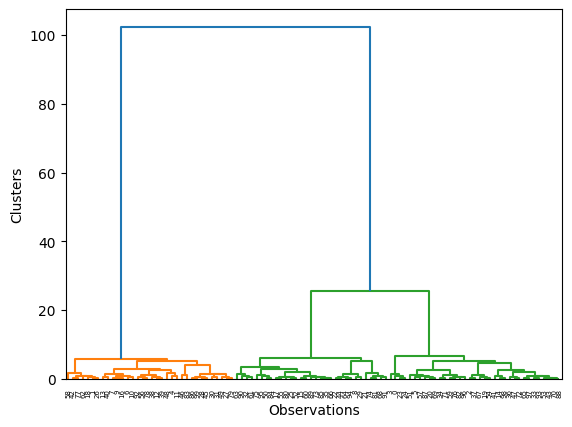

Details of the predicted cluster are:
 <bound method IndexOpsMixin.value_counts of 0     0
1     1
2     0
3     0
4     1
     ..
95    2
96    0
97    0
98    0
99    1
Name: Predicted, Length: 100, dtype: int64>
Confusion matrix is:
 [[ 0 34  0]
 [ 0  0 33]
 [31  0  2]]
The accuracy is : 0.02


/tmp/ipython-input-63908613.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clusterdf['Original'].replace(to_replace=int("0"), value="Class 0", inplace=True)
/tmp/ipython-input-63908613.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
#Importing necessary libraries.
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

#Reading dataset.
x,y = make_blobs()
print("Dimension of independent variables is: ", x.shape)

#Performing Clustering.
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(x)
print("The predicted clusters are:\n", y_agg)

#Creating a dendrogram.
from scipy.cluster.hierarchy import dendrogram, ward
result = ward(x)
dendrogram(result)
plt.xlabel("Observations")
plt.ylabel("Clusters")
plt.show()

#Storing values in the form of data frame.
import pandas
data = {'Original':y, 'Predicted': y_agg}
clusterdf = pandas.DataFrame(data,columns=['Original','Predicted'])
print("Details of the predicted cluster are:\n", clusterdf["Predicted"].value_counts)

#Creating names of the clusters.
clusterdf['Original'].replace(to_replace=int("0"), value="Class 0", inplace=True)
clusterdf['Original'].replace(to_replace=int("1"), value="Class 1", inplace=True)
clusterdf['Original'].replace(to_replace=int("2"), value="Class 2", inplace=True)
clusterdf['Predicted'].replace(to_replace=int("0"), value="Class 2", inplace=True)
clusterdf['Predicted'].replace(to_replace=int("1"), value="Class 1", inplace=True)
clusterdf['Predicted'].replace(to_replace=int("2"), value="Class 0", inplace=True)

#Creating Confusion Matrix of the Model.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(clusterdf['Original'], clusterdf['Predicted'])
print("Confusion matrix is:\n", cm)

#Determining accuracy of the model.
from sklearn.metrics import accuracy_score
score=accuracy_score(clusterdf['Original'], clusterdf['Predicted'])
print("The accuracy is :",score)

**Refined Code**

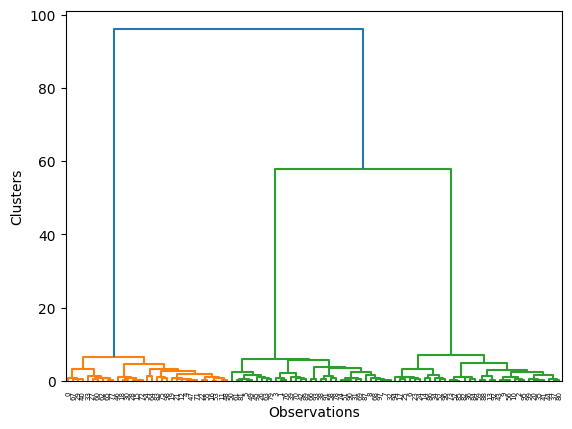

Confusion matrix before mapping:
 [[34  0  0]
 [ 0  0 33]
 [ 0 33  0]]
Mapping of predicted clusters to original labels: {np.int64(0): np.int64(0), np.int64(2): np.int64(1), np.int64(1): np.int64(2)}
Confusion matrix after mapping:
 [[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy after mapping: 1.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.optimize import linear_sum_assignment
import numpy as np

# Generate data
x, y = make_blobs(random_state=42)

# Clustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(x)

# Dendrogram
result = ward(x)
dendrogram(result)
plt.xlabel("Observations")
plt.ylabel("Clusters")
plt.show()

# Confusion matrix
cm = confusion_matrix(y, y_agg)
print("Confusion matrix before mapping:\n", cm)

# Best mapping of cluster labels to original labels
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
print("Mapping of predicted clusters to original labels:", mapping)

# Apply mapping
y_agg_mapped = np.array([mapping[label] for label in y_agg])

# Confusion matrix and accuracy after mapping
cm_mapped = confusion_matrix(y, y_agg_mapped)
print("Confusion matrix after mapping:\n", cm_mapped)
acc = accuracy_score(y, y_agg_mapped)
print("Accuracy after mapping:", acc)
